# Function defs BEGINNER

Esta tabla contiene la información de las definiciones de funciones.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'functiondef__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('functiondefs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-06-17 17:04:55.130893 Data cache files found ...
2024-06-17 17:04:55.140436 Data cache files successfully loaded!!
The dataset contains 24213 (43.59%) instances for BEGINNER class and 31335 (56.41%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'functiondefs'
TABLE_FEATURES = ['functiondef__name_convention', 'functiondef__number_of_characters', 'functiondef__is_magic', 'functiondef__is_private', 'functiondef__body_count', 'functiondef__expressions_pct', 'functiondef__is_async', 'functiondef__number_of_decorators', 'functiondef__has_return_type_annotation', 'functiondef__has_doc_string', 'functiondef__height', 'functiondef__type_annotations_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (24213, 12)
As we can see the downloaded data contains a total of 24213 instances. For each instance we have 12 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24213 entries, 0 to 24232
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   functiondef__name_convention             24213 non-null  object 
 1   functiondef__number_of_characters        24213 non-null  int64  
 2   functiondef__is_magic                    24213 non-null  bool   
 3   functiondef__is_private                  24213 non-null  bool   
 4   functiondef__body_count                  24213 non-null  int64  
 5   functiondef__expressions_pct             24213 non-null  float64
 6   functiondef__is_async                    24213 non-null  bool   
 7   functiondef__number_of_decorators        24213 non-null  int64  
 8   functiondef__has_return_type_annotation  24213 non-null  bool   
 9   functiondef__has_doc_string              24213 non-null  bool   
 10  functiondef__height                      24213 non-

Cómo podemos ver la tabla está compuesta por 6 variables numéricas, 5 variables boleanas y dos de tipo objeto. 

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

functiondef__name_convention               0
functiondef__number_of_characters          0
functiondef__is_magic                      0
functiondef__is_private                    0
functiondef__body_count                    0
functiondef__expressions_pct               0
functiondef__is_async                      0
functiondef__number_of_decorators          0
functiondef__has_return_type_annotation    0
functiondef__has_doc_string                0
functiondef__height                        0
functiondef__type_annotations_pct          0
dtype: int64

In [6]:
print_empty_cols(X)

functiondef__name_convention
----------------------------
0 instancias no tienen un valor para la columna functiondef__name_convention


functiondef__number_of_characters
---------------------------------
0 instancias no tienen un valor para la columna functiondef__number_of_characters


functiondef__is_magic
---------------------
0 instancias no tienen un valor para la columna functiondef__is_magic


functiondef__is_private
-----------------------
0 instancias no tienen un valor para la columna functiondef__is_private


functiondef__body_count
-----------------------
0 instancias no tienen un valor para la columna functiondef__body_count


functiondef__expressions_pct
----------------------------
0 instancias no tienen un valor para la columna functiondef__expressions_pct


functiondef__is_async
---------------------
0 instancias no tienen un valor para la columna functiondef__is_async


functiondef__number_of_decorators
---------------------------------
0 instancias no tienen un valo

### 2.2 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
functiondef__name_convention,24213,7,SnakeCase,14783,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_characters,24213.0,NaN,NaN,NaN,13.31194,6.276093,1.0,9.0,13.0,17.0,50.0
functiondef__is_magic,24213,2,False,24189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__is_private,24213,2,False,20144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__body_count,24213.0,NaN,NaN,NaN,4.286003,3.964438,1.0,2.0,3.0,5.0,78.0
functiondef__expressions_pct,24213.0,NaN,NaN,NaN,0.240675,0.252369,0.0,0.0,0.2,0.357143,1.0
functiondef__is_async,24213,2,False,24153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_decorators,24213.0,NaN,NaN,NaN,0.020691,0.142352,0.0,0.0,0.0,0.0,1.0
functiondef__has_return_type_annotation,24213,2,False,20474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__has_doc_string,24213,2,True,12261,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "functiondef__expressions_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1.0), (1.0, inf)], # min: 0 ; max: 1
    "functiondef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 46
    "functiondef__type_annotations_pct": [(0.0, 0.0), (0.0, 1.0), (1.0, inf)], # min: 0 ; max: 1
    "functiondef__number_of_characters": [(1.0, 8.0), (8.0, 12), (12, 18), (18, inf)], # min: 1 ; max: 87
    "functiondef__body_count": [(1.0, 1.0), (1.0, 3.0), (3.0, 5.0), (5.0, inf)], # min: 1 ; max: 364
    "functiondef__height": [(1.0, 1.0), (1.0, 1.9), (2.0, 2.0), (2.0, inf)], # min: 1 ; max: 10
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['functiondef__expressions_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['functiondef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_characters'], 10))
print(get_statistics(X_copy, ['functiondef__body_count'], 10))
print(get_statistics(X_copy, ['functiondef__height'], 10))
print(get_statistics(X_copy, ['functiondef__name_convention'], 10))
print(get_statistics(X_copy, ['functiondef__is_private'], 10))
print(get_statistics(X_copy, ['functiondef__is_magic'], 10))
print(get_statistics(X_copy, ['functiondef__is_async'], 10))
print(get_statistics(X_copy, ['functiondef__has_return_type_annotation'], 10))
print(get_statistics(X_copy, ['functiondef__has_doc_string'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
functiondef__expressions_pct  count  percentage
                   [0.0_0.5)   9980   41.217528
                   [0.0_0.0]   8818   36.418453
                   [0.5_1.0)   4578   18.907199
                   [1.0_inf]    837    3.456821

functiondef__number_of_decorators  count  percentage
                        [0.0_0.0]  23712   97.930864
                        [0.0_inf]    501    2.069136

functiondef__type_annotations_pct  count  percentage
                        [0.0_0.0]  20453   84.471152
                        [1.0_inf]   3746   15.471028
                        [0.0_1.0)     14    0.057820

functiondef__number_of_characters  count  percentage
                          [12_18)   8535   35.249659
                         [8.0_12)   5651   23.338702
                         [18_inf]   5527   22.826581
                        [1.0_8.0)   4500   18.585058

functiondef__body_count  count  percentage
              [5.0_inf]   7934   32.767522
           

In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (24213, 18)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

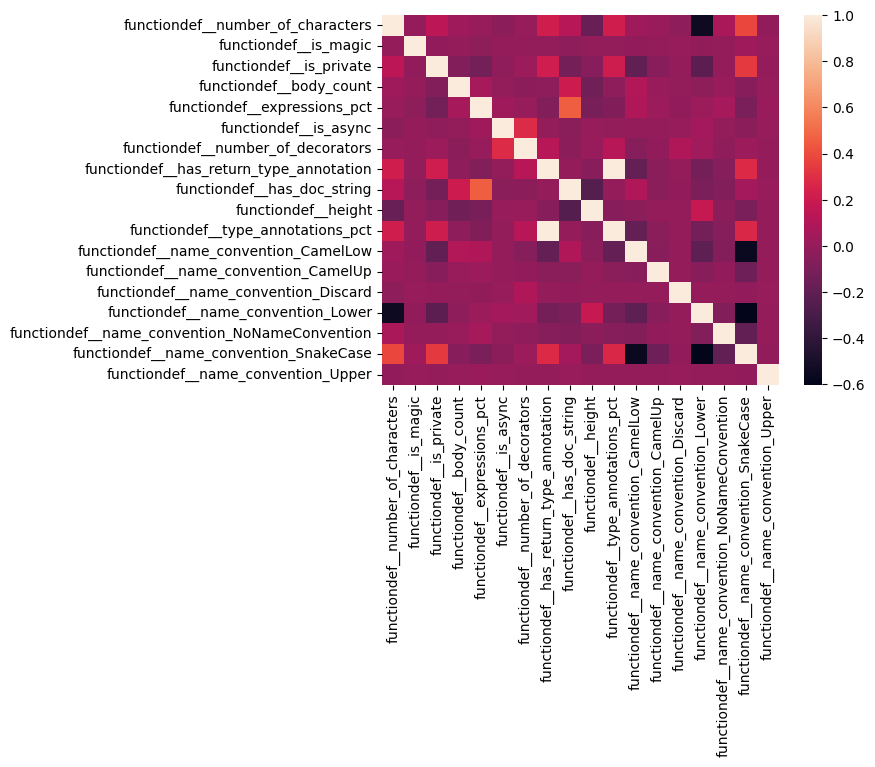

In [10]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 12 variables (2 porcentuales, 4 numericas, 5 booleanas y 1 categorica)

### Variable is_private (1/12)
Esta variable es de tipo booleano y representa si la función es privada.

<Axes: xlabel='functiondef__is_private', ylabel='Count'>

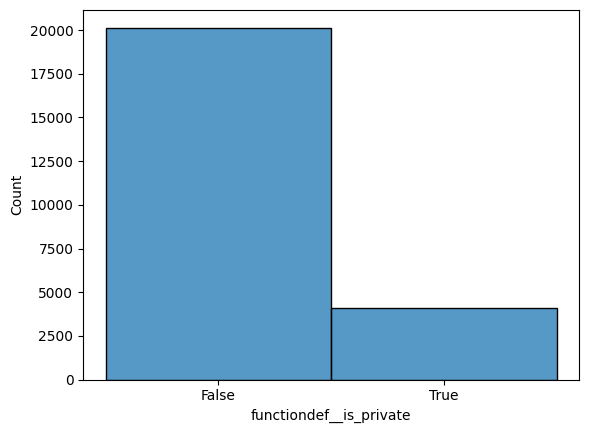

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_private'], discrete=True)

In [12]:
num_true_values = len(X[X['functiondef__is_private'] == True])
num_false_values = len(X[X['functiondef__is_private'] == False])
std = X['functiondef__is_private'].std()
freq_true = len(X[X['functiondef__is_private'] == True]) / len(X['functiondef__is_private'])
freq_false = len(X[X['functiondef__is_private'] == False]) / len(X['functiondef__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 4069 valores verdaderos y 20144 valores falsos. Y, la desviación típica es de 0.3739185929298401
La frecuencia con la que programa puede tener la variable is_private a True es 0.16805022095568498.
La frecuencia con la que programa puede tener la variable is_private a False es 0.831949779044315.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_private', possible_values)

La variable functiondef__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_private toma el valor de 0.0 en un 83.19% de los items.
La variable functiondef__is_private toma el valor de 1.0 en un 16.81% de los items.


In [14]:
X[X['functiondef__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,4069.000000,4069.0,4069.0,4069.000000,4069.000000,4069.0,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.0,4069.0,4069.0,4069.0,4069.000000,4069.000000,4069.0
mean,15.228558,0.0,1.0,3.646842,0.168517,0.0,0.027525,0.324650,0.370361,1.132711,0.324650,0.0,0.0,0.0,0.0,0.022118,0.977882,0.0
std,6.552065,0.0,0.0,3.487353,0.239126,0.0,0.163628,0.468301,0.482961,0.506675,0.468301,0.0,0.0,0.0,0.0,0.147087,0.147087,0.0
min,4.000000,0.0,1.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,11.000000,0.0,1.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
50%,14.000000,0.0,1.0,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
75%,20.000000,0.0,1.0,5.000000,0.333333,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
max,43.000000,0.0,1.0,57.000000,1.000000,0.0,1.000000,1.000000,1.000000,7.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0


### Variable is_magic (2/12)
Esta variable es de tipo booleano y representa si la función es de la forma __\w__.

<Axes: xlabel='functiondef__is_magic', ylabel='Count'>

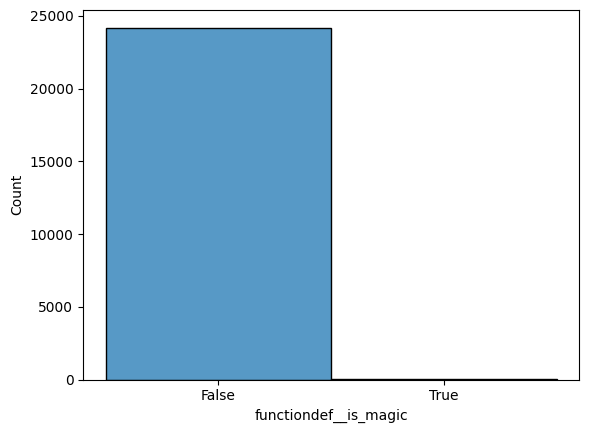

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_magic'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_magic'] == True])
num_false_values = len(X[X['functiondef__is_magic'] == False])
std = X['functiondef__is_magic'].std()
freq_true = len(X[X['functiondef__is_magic'] == True]) / len(X['functiondef__is_magic'])
freq_false = len(X[X['functiondef__is_magic'] == False]) / len(X['functiondef__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 24 valores verdaderos y 24189 valores falsos. Y, la desviación típica es de 0.03146842122077942
La frecuencia con la que programa puede tener la variable is_magic a True es 0.0009912030727295255.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.9990087969272705.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_magic', possible_values)

La variable functiondef__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_magic toma el valor de 0.0 en un 99.9% de los items.
La variable functiondef__is_magic toma el valor de 1.0 en un 0.09912% de los items. [OUTLIER]


In [18]:
X[X['functiondef__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,24.0,24.0,24.0,24.000000,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
mean,12.0,1.0,0.0,3.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,0.0,0.0,0.0,0.510754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,12.0,1.0,0.0,3.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,12.0,1.0,0.0,3.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,12.0,1.0,0.0,3.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,12.0,1.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,12.0,1.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Variable is_async (3/12)
Esta variable es booleana y representa si la función es asincrona.

<Axes: xlabel='functiondef__is_async', ylabel='Count'>

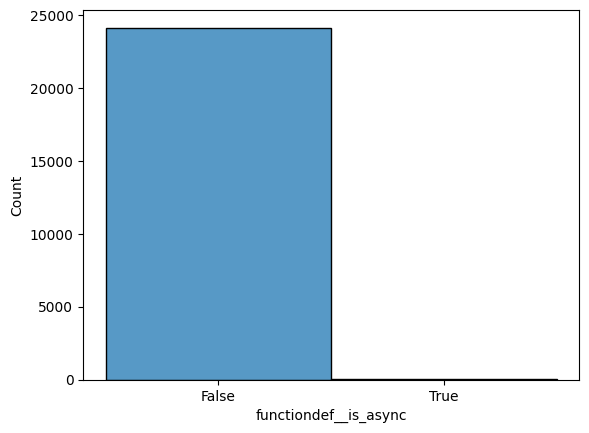

In [19]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_async'], discrete=True)

In [20]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_async'] == True])
num_false_values = len(X[X['functiondef__is_async'] == False])
std = X['functiondef__is_async'].std()
freq_true = len(X[X['functiondef__is_async'] == True]) / len(X['functiondef__is_async'])
freq_false = len(X[X['functiondef__is_async'] == False]) / len(X['functiondef__is_async'])
print(f'La variable is_async contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_async a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_async a False es {freq_false}.')

La variable is_async contiene 60 valores verdaderos y 24153 valores falsos. Y, la desviación típica es de 0.04971890151500702
La frecuencia con la que programa puede tener la variable is_async a True es 0.0024780076818238135.
La frecuencia con la que programa puede tener la variable is_async a False es 0.9975219923181762.


In [21]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_async', possible_values)

La variable functiondef__is_async contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_async toma el valor de 0.0 en un 99.75% de los items.
La variable functiondef__is_async toma el valor de 1.0 en un 0.2478% de los items.


In [22]:
X[X['functiondef__is_async'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,60.000000,60.0,60.0,60.000000,60.000000,60.0,60.000000,60.000000,60.0,60.000000,60.000000,60.000000,60.0,60.0,60.000000,60.0,60.000000,60.0
mean,8.900000,0.0,0.0,3.700000,0.378645,1.0,0.833333,0.083333,0.0,1.200000,0.083333,0.150000,0.0,0.0,0.600000,0.0,0.250000,0.0
std,4.824725,0.0,0.0,2.612227,0.304354,0.0,0.375823,0.278718,0.0,0.605063,0.278718,0.360085,0.0,0.0,0.494032,0.0,0.436667,0.0
min,4.000000,0.0,0.0,1.000000,0.000000,1.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
25%,5.000000,0.0,0.0,2.000000,0.225962,1.0,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
50%,8.000000,0.0,0.0,3.500000,0.267857,1.0,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.0
75%,10.500000,0.0,0.0,4.000000,0.541667,1.0,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.250000,0.0
max,22.000000,0.0,0.0,13.000000,1.000000,1.0,1.000000,1.000000,0.0,3.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0


### Variable has_return_type_annotation (4/12)
Esta variable es booleana y representa si la function tiene una anotacion del tipo de retorno.

<Axes: xlabel='functiondef__has_return_type_annotation', ylabel='Count'>

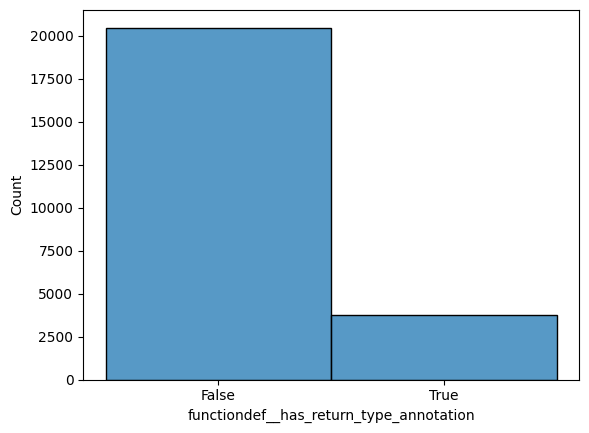

In [23]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_return_type_annotation'], discrete=True)

In [24]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_return_type_annotation'] == True])
num_false_values = len(X[X['functiondef__has_return_type_annotation'] == False])
std = X['functiondef__has_return_type_annotation'].std()
freq_true = len(X[X['functiondef__has_return_type_annotation'] == True]) / len(X['functiondef__has_return_type_annotation'])
freq_false = len(X[X['functiondef__has_return_type_annotation'] == False]) / len(X['functiondef__has_return_type_annotation'])
print(f'La variable has_return_type_annotation contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es {freq_false}.')

La variable has_return_type_annotation contiene 3739 valores verdaderos y 20474 valores falsos. Y, la desviación típica es de 0.36135947704315186
La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es 0.154421178705654.
La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es 0.845578821294346.


In [25]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_return_type_annotation', possible_values)

La variable functiondef__has_return_type_annotation contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_return_type_annotation toma el valor de 0.0 en un 84.56% de los items.
La variable functiondef__has_return_type_annotation toma el valor de 1.0 en un 15.44% de los items.


In [26]:
X[X['functiondef__has_return_type_annotation'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,3739.000000,3739.0,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.0,3739.000000,3739.000000,3739.0,3739.000000,3739.0,3739.0,3739.000000,3739.000000,3739.000000,3739.0
mean,16.601231,0.0,0.353303,4.035036,0.195960,0.001337,0.060444,1.0,0.498796,1.133993,1.0,0.002140,0.0,0.0,0.072747,0.001337,0.923776,0.0
std,6.699913,0.0,0.478060,3.443669,0.222650,0.036549,0.238339,0.0,0.500065,0.472312,0.0,0.046213,0.0,0.0,0.259755,0.036549,0.265391,0.0
min,3.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,12.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0
50%,16.000000,0.0,0.000000,3.000000,0.166667,0.000000,0.000000,1.0,0.000000,1.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0
75%,20.000000,0.0,1.000000,5.000000,0.333333,0.000000,0.000000,1.0,1.000000,1.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0
max,50.000000,0.0,1.000000,56.000000,1.000000,1.000000,1.000000,1.0,1.000000,5.000000,1.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0


### Variable has_doc_string (5/12)
Esta variable es booleana y representa si la function comienza por un String plano a modo de comentario.

<Axes: xlabel='functiondef__has_doc_string', ylabel='Count'>

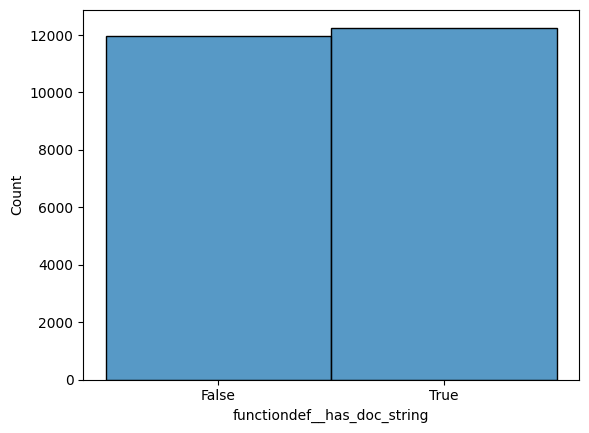

In [27]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_doc_string'], discrete=True)

In [28]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_doc_string'] == True])
num_false_values = len(X[X['functiondef__has_doc_string'] == False])
std = X['functiondef__has_doc_string'].std()
freq_true = len(X[X['functiondef__has_doc_string'] == True]) / len(X['functiondef__has_doc_string'])
freq_false = len(X[X['functiondef__has_doc_string'] == False]) / len(X['functiondef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 12261 valores verdaderos y 11952 valores falsos. Y, la desviación típica es de 0.49996960163116455
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.5063808697806963.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.4936191302193037.


In [29]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_doc_string', possible_values)

La variable functiondef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_doc_string toma el valor de 1.0 en un 50.64% de los items.
La variable functiondef__has_doc_string toma el valor de 0.0 en un 49.36% de los items.


In [30]:
X[X['functiondef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,12261.000000,12261.0,12261.000000,12261.000000,12261.000000,12261.0,12261.000000,12261.000000,12261.0,12261.000000,12261.000000,12261.000000,12261.000000,12261.0,12261.000000,12261.000000,12261.000000,12261.000000
mean,14.073485,0.0,0.122910,5.072588,0.355768,0.0,0.015333,0.152108,1.0,1.052117,0.152593,0.195498,0.008238,0.0,0.148357,0.012560,0.635103,0.000245
std,6.155601,0.0,0.328347,4.056870,0.192661,0.0,0.122879,0.359140,0.0,0.304359,0.359385,0.396600,0.090390,0.0,0.355468,0.111371,0.481421,0.015641
min,2.000000,0.0,0.000000,1.000000,0.021277,0.0,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.000000,3.000000,0.200000,0.0,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,13.000000,0.0,0.000000,4.000000,0.333333,0.0,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,18.000000,0.0,0.000000,6.000000,0.500000,0.0,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,50.000000,0.0,1.000000,78.000000,1.000000,0.0,1.000000,1.000000,1.0,5.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable number_of_characters (6/12)
Esta variable representa el número de caracteres que tiene el nombre de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 50. Con una media de 13.3.

<Axes: ylabel='functiondef__number_of_characters'>

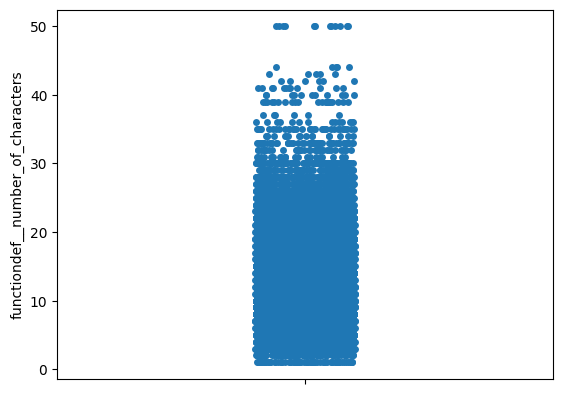

In [31]:
sns.stripplot(X['functiondef__number_of_characters'])

In [32]:
print_outliers_for_df_column(X, 'functiondef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5945708090406656
Rango valores atípicos extremos (Tukey): [-15.0,41.0]
Rango valores atípicos leves (Tukey): [-3.0,29.0]
Rango valores atípicos extremos (Fixed BoxPlot): [7.502332619356887,146.436431730168]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -15.0 (Q1-3*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -3.0 (Q1-1.5*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 354 instancias tienen un valor para functiondef__number_of_characters superior a 29.0 (Q3+1.5*IQR) para functiondef__number_of_characters. Representando un 1.462% del total de instancias.
+3.0IQR: 28 instancias tienen un valor para functiondef__number_of_characters superior a 41.0 (Q3-3*IQR) para functiondef__number_of_characters. Repres

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 41.0 (Con un MC de 59 usamos Tuckey Extremo)

In [33]:
X[X['functiondef__number_of_characters'] > 41].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,28.000000,28.0,28.000000,28.000000,28.000000,28.0,28.0,28.000000,28.000000,28.000000,28.000000,28.0,28.0,28.0,28.0,28.0,28.0,28.0
mean,45.964287,0.0,0.392857,3.392857,0.580357,0.0,0.0,0.535714,0.214286,1.214286,0.535714,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,3.615626,0.0,0.497347,2.558056,0.402846,0.0,0.0,0.507874,0.417855,0.417855,0.507874,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,42.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,43.000000,0.0,0.000000,2.000000,0.250000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,44.000000,0.0,0.000000,2.000000,0.500000,0.0,0.0,1.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,50.000000,0.0,1.000000,5.000000,1.000000,0.0,0.0,1.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,50.000000,0.0,1.000000,8.000000,1.000000,0.0,0.0,1.000000,1.000000,2.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### IMPORTANTE
Hay que revisar los 12 con nombres de 50

### Variable body_count (7/12)
Esta variable representa el número de sentencias en el root de la función. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 78. Con una media de 4.28.

<Axes: ylabel='functiondef__body_count'>

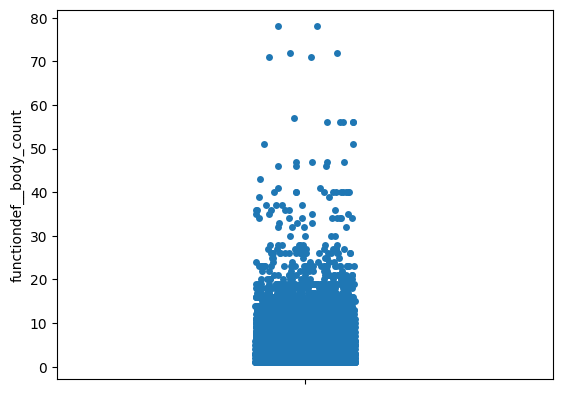

In [34]:
sns.stripplot(X['functiondef__body_count'])

### IMPORTANTE
Los valores máximos están muy alejados del siguiente.

In [35]:
print_outliers_for_df_column(X, 'functiondef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8041513929416109
Rango valores atípicos extremos (Tukey): [-7.0,14.0]
Rango valores atípicos leves (Tukey): [-2.5,9.5]
Rango valores atípicos extremos (Fixed BoxPlot): [1.7303020037780374,117.24488622204757]
-3.0IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -7.0 (Q1-3*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -2.5 (Q1-1.5*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 1684 instancias tienen un valor para functiondef__body_count superior a 9.5 (Q3+1.5*IQR) para functiondef__body_count. Representando un 6.955% del total de instancias.
+3.0IQR: 523 instancias tienen un valor para functiondef__body_count superior a 14.0 (Q3-3*IQR) para functiondef__body_count. Representando un 2.16% del total de instancias.
L: 3961 instancias tienen un valor pa

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 14.0 (Con un MC de 80 usamos U)

In [36]:
X[X['functiondef__body_count'] > 14].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,523.000000,523.0,523.000000,523.000000,523.000000,523.0,523.000000,523.000000,523.000000,523.00000,523.000000,523.000000,523.000000,523.0,523.000000,523.000000,523.000000,523.0
mean,11.814531,0.0,0.059273,21.772467,0.297465,0.0,0.011472,0.078394,0.629063,1.09369,0.078394,0.277247,0.009560,0.0,0.242830,0.036329,0.434034,0.0
std,5.821911,0.0,0.236362,9.810457,0.259184,0.0,0.106595,0.269048,0.483518,0.40686,0.269048,0.448068,0.097401,0.0,0.429204,0.187286,0.496104,0.0
min,3.000000,0.0,0.000000,15.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,8.000000,0.0,0.000000,16.000000,0.066667,0.0,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,11.000000,0.0,0.000000,18.000000,0.200000,0.0,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,15.000000,0.0,0.000000,23.000000,0.500000,0.0,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
max,33.000000,0.0,1.000000,78.000000,1.000000,0.0,1.000000,1.000000,1.000000,4.00000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### IMPORTANTE
Hay que revisar los 6 que tienen longitud mayor de 70

### Variable number_of_decorators (8/12)
Esta variable representa el número de decoradores de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 1. Con una media de 0.02.

<Axes: ylabel='functiondef__number_of_decorators'>

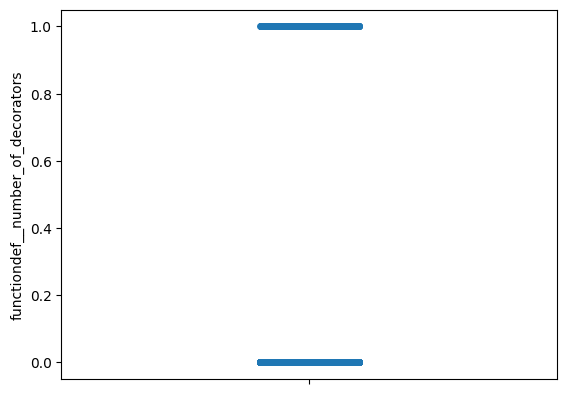

In [37]:
sns.stripplot(X['functiondef__number_of_decorators'])

In [38]:
print_outliers_for_df_column(X, 'functiondef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.916977509245367
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 501 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para functiondef__number_of_decorators. Representando un 2.069% del total de instancias.
+3.0IQR: 501 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3-3*IQR) para functiondef__number_of_decorators. Representando un 2.069% del total de instan

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [39]:
X[X['functiondef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,501.000000,501.0,501.000000,501.000000,501.000000,501.000000,501.0,501.000000,501.000000,501.000000,501.000000,501.000000,501.0,501.00000,501.000000,501.0,501.000000,501.0
mean,13.510978,0.0,0.223553,3.323353,0.247909,0.099800,1.0,0.451098,0.375250,1.253493,0.451098,0.011976,0.0,0.00998,0.297405,0.0,0.680639,0.0
std,7.153627,0.0,0.417042,3.470913,0.259050,0.300033,0.0,0.498100,0.484671,0.584477,0.498100,0.108887,0.0,0.09950,0.457573,0.0,0.466695,0.0
min,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0
25%,7.000000,0.0,0.000000,2.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0
50%,13.000000,0.0,0.000000,2.000000,0.250000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,1.000000,0.0
75%,18.000000,0.0,0.000000,4.000000,0.500000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.00000,1.000000,0.0,1.000000,0.0
max,30.000000,0.0,1.000000,27.000000,1.000000,1.000000,1.0,1.000000,1.000000,4.000000,1.000000,1.000000,0.0,1.00000,1.000000,0.0,1.000000,0.0


### IMPORTANTE
El 97% de las funciones no tienen decoradores. 

### Variable height (9/12)
Esta variable representa la distancia desde la función hasta el root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 7. Con una media de 1.21.

<Axes: ylabel='functiondef__height'>

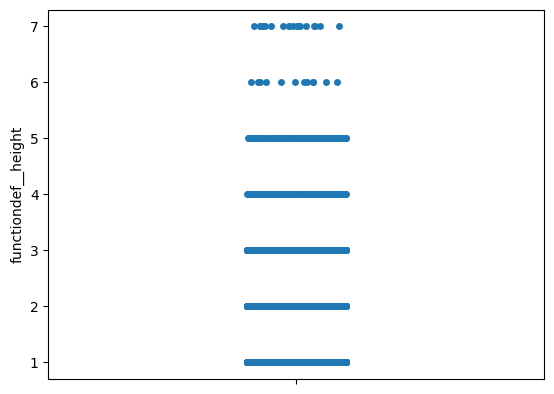

In [40]:
sns.stripplot(X['functiondef__height'])

In [41]:
print_outliers_for_df_column(X, 'functiondef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__height inferior a 1.0 (Q1-3*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__height inferior a 1.0 (Q1-1.5*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 3033 instancias tienen un valor para functiondef__height superior a 1.0 (Q3+1.5*IQR) para functiondef__height. Representando un 12.53% del total de instancias.
+3.0IQR: 3033 instancias tienen un valor para functiondef__height superior a 1.0 (Q3-3*IQR) para functiondef__height. Representando un 12.53% del total de instancias.
L: 0 instancias tienen un valor para functiondef__height inferior a 1.0 para functiondef__height. Representando un 0.0

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1.0 (Todos los umbrales son 1)

In [42]:
X[X['functiondef__height'] > 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,3033.000000,3033.0,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.0,3033.000000,3033.000000,3033.000000,3033.0
mean,10.628421,0.0,0.112760,2.620508,0.136653,0.001978,0.030992,0.110781,0.133201,2.702605,0.110781,0.125288,0.015826,0.0,0.378833,0.005935,0.474118,0.0
std,6.208881,0.0,0.316351,2.722318,0.258587,0.044441,0.173326,0.313913,0.339848,0.939065,0.313913,0.331100,0.124822,0.0,0.485176,0.076821,0.499412,0.0
min,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,6.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,9.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,14.000000,0.0,0.000000,3.000000,0.200000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.0
max,50.000000,0.0,1.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### IMPORTANTE
Hay 18 funciones con altura mayor que 6, hay que analizarlas 

### Variable expressions_pct (10/12)
Esta variable representa la proporción de las sentencias en el root de la funcion que son expresiones. Toma los valores de 0.0 - 1.0. La media es 0.24.

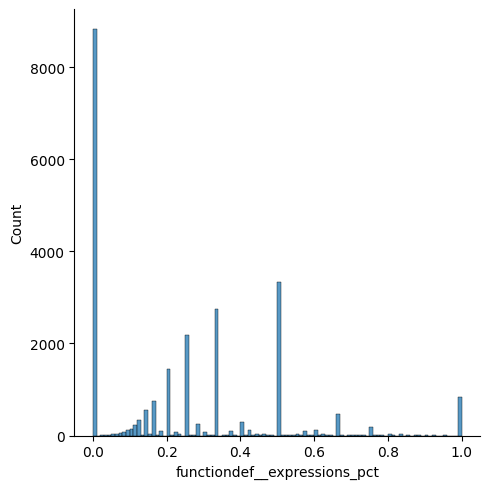

In [43]:
sns.displot(X['functiondef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [44]:
print_outliers_for_df_column(X, 'functiondef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5069555938243866
Rango valores atípicos extremos (Tukey): [-1.0714285969734192,1.4285714626312256]
Rango valores atípicos leves (Tukey): [-0.5357142984867096,0.892857164144516]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.09085423557328857,4.427244985729389]
-3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -1.0714285969734192 (Q1-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -0.5357142984867096 (Q1-1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 849 instancias tienen un valor para functiondef__expressions_pct superior a 0.892857164144516 (Q3+1.5*IQR) para functiondef__expressions_pct. Representando un 3.506% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct superio

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.89 (Con un MC de 0.50 usamos Tuckey)

In [45]:
X[X['functiondef__expressions_pct'] > 0.89].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,849.000000,849.0,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.0,849.000000,849.000000,849.000000,849.0
mean,12.524146,0.0,0.160188,2.896349,0.998987,0.007067,0.021201,0.089517,0.421673,1.382803,0.089517,0.171967,0.050648,0.0,0.242638,0.091873,0.442874,0.0
std,7.587054,0.0,0.366997,3.841322,0.008630,0.083818,0.144140,0.285657,0.494118,0.989681,0.285657,0.377574,0.219407,0.0,0.428931,0.289017,0.497019,0.0
min,3.000000,0.0,0.000000,1.000000,0.909091,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,7.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,11.000000,0.0,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,16.000000,0.0,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
max,50.000000,0.0,1.000000,47.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### Variable type_annotations_pct (11/12)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo en la función (incluyendo el return). Este campo toma valores del 0.0 - 1.0. Su media es 0.15.

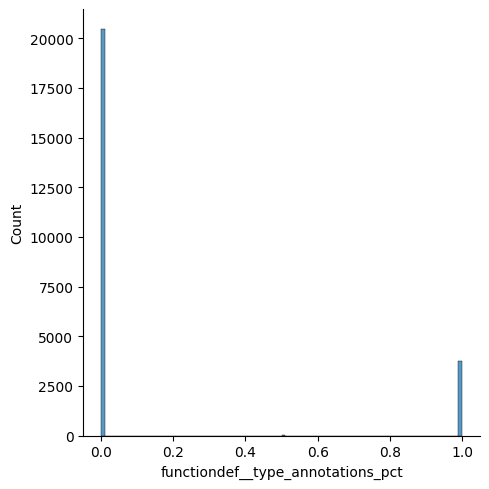

In [46]:
sns.displot(X['functiondef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [47]:
print_outliers_for_df_column(X, 'functiondef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7082731022202997
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a 0.0 (Q1-3*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a 0.0 (Q1-1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 3760 instancias tienen un valor para functiondef__type_annotations_pct superior a 0.0 (Q3+1.5*IQR) para functiondef__type_annotations_pct. Representando un 15.53% del total de instancias.
+3.0IQR: 3760 instancias tienen un valor para functiondef__type_annotations_pct superior a 0.0 (Q3-3*IQR) para functiondef__type_annotations_pct. Representando un 15.53% del total de ins

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.0 (Todos los umbrales son 0)

In [48]:
X[X['functiondef__type_annotations_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,3760.000000,3760.0,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.0,3760.0,3760.000000,3760.000000,3760.000000,3760.0
mean,16.576063,0.0,0.351330,4.042819,0.195742,0.001330,0.060106,0.994415,0.498936,1.133245,0.998078,0.004521,0.0,0.0,0.072606,0.001596,0.921277,0.0
std,6.693976,0.0,0.477449,3.443077,0.222297,0.036447,0.237715,0.074534,0.500065,0.471097,0.033676,0.067097,0.0,0.0,0.259524,0.039920,0.269342,0.0
min,3.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.200000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,12.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0
50%,16.000000,0.0,0.000000,3.000000,0.166667,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0
75%,20.000000,0.0,1.000000,5.000000,0.333333,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0
max,50.000000,0.0,1.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0


### IMPORTANTE
El 84% tienen un 0% y el 15% un 100% de anotaciones de tipo.

### Variable name_convention (12/12)
Esta variable es de tipo categórica y representa la name_convention del nombre de la funcion.

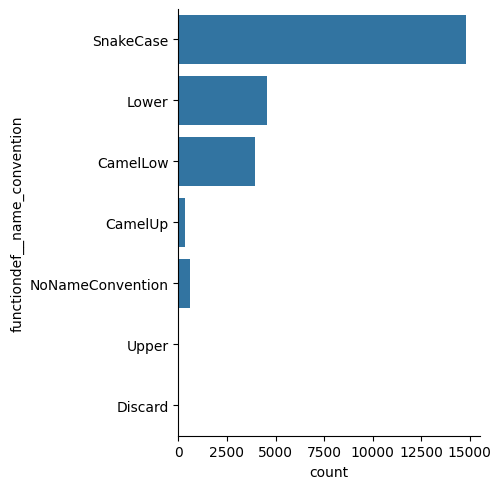

In [49]:
sns.catplot(full_table['functiondef__name_convention'], kind="count")

In [50]:
print_frequency_anal_for_cat_var(full_table, 'functiondef__name_convention')

La variable functiondef__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable functiondef__name_convention toma el valor de SnakeCase en un 61.05% de los items.
La variable functiondef__name_convention toma el valor de Lower en un 18.76% de los items.
La variable functiondef__name_convention toma el valor de CamelLow en un 16.36% de los items.
La variable functiondef__name_convention toma el valor de NoNameConvention en un 2.395% de los items.
La variable functiondef__name_convention toma el valor de CamelUp en un 1.4% de los items.
La variable functiondef__name_convention toma el valor de Discard en un 0.02065% de los items. [OUTLIER]
La variable functiondef__name_convention toma el valor de Upper en un 0.01239% de los items. [OUTLIER]


In [51]:
print_values_usage_for_cat_var(full_table, 'functiondef__name_convention', NAMING_CONVENTION_VALUES)

La variable functiondef__name_convention puede tomar 7 valores distintos
	7 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


### IMPORTANTE
Dicard y Upper son outliers

## Multivariate

Isolation forest algorithm

In [52]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,functiondef_id,functiondef__name_convention,functiondef__number_of_characters,functiondef__is_private,functiondef__is_magic,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__expertise_level
11385,1882913,Lower,6,False,False,1,1.000000,False,1,True,False,1,1.0,BEGINNER
11409,1881406,Lower,7,False,False,1,0.000000,False,1,True,False,2,1.0,BEGINNER
11431,1877406,Lower,6,False,False,2,0.000000,False,1,True,False,2,1.0,BEGINNER
11541,1861804,NoNameConvention,33,False,False,15,0.133333,False,0,True,True,1,1.0,BEGINNER
13902,2399175,Lower,6,False,False,1,1.000000,False,1,True,False,1,1.0,BEGINNER
13923,2397668,Lower,7,False,False,1,0.000000,False,1,True,False,2,1.0,BEGINNER
13949,2393668,Lower,6,False,False,2,0.000000,False,1,True,False,2,1.0,BEGINNER
14056,2378066,NoNameConvention,33,False,False,15,0.133333,False,0,True,True,1,1.0,BEGINNER
16819,2960697,Lower,6,False,False,1,1.000000,False,1,True,False,1,1.0,BEGINNER
16840,2959190,Lower,7,False,False,1,0.000000,False,1,True,False,2,1.0,BEGINNER


### IMPORTANTE
Hay que analizar los 30 los outliers de la tabla.

In [53]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
functiondef__number_of_characters,20.0,13.000000,11.854380,6.0,6.00,6.500000,13.50,33.0
functiondef__is_magic,20.0,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0
functiondef__is_private,20.0,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0
functiondef__body_count,20.0,4.750000,6.086007,1.0,1.00,1.500000,5.25,15.0
functiondef__expressions_pct,20.0,0.283333,0.428174,0.0,0.00,0.066667,0.35,1.0
functiondef__is_async,20.0,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0
functiondef__number_of_decorators,20.0,0.750000,0.444262,0.0,0.75,1.000000,1.00,1.0
functiondef__has_return_type_annotation,20.0,1.000000,0.000000,1.0,1.00,1.000000,1.00,1.0
functiondef__has_doc_string,20.0,0.250000,0.444262,0.0,0.00,0.000000,0.25,1.0
functiondef__height,20.0,1.500000,0.512989,1.0,1.00,1.500000,2.00,2.0


In [54]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
functiondef__number_of_characters,24193.0,13.312198,6.269886,1.0,9.0,13.0,17.000000,50.0
functiondef__is_magic,24193.0,0.000992,0.031481,0.0,0.0,0.0,0.000000,1.0
functiondef__is_private,24193.0,0.168189,0.374042,0.0,0.0,0.0,0.000000,1.0
functiondef__body_count,24193.0,4.285620,3.962385,1.0,2.0,3.0,5.000000,78.0
functiondef__expressions_pct,24193.0,0.240640,0.252185,0.0,0.0,0.2,0.357143,1.0
functiondef__is_async,24193.0,0.002480,0.049739,0.0,0.0,0.0,0.000000,1.0
functiondef__number_of_decorators,24193.0,0.020088,0.140306,0.0,0.0,0.0,0.000000,1.0
functiondef__has_return_type_annotation,24193.0,0.153722,0.360690,0.0,0.0,0.0,0.000000,1.0
functiondef__has_doc_string,24193.0,0.506593,0.499967,0.0,0.0,1.0,1.000000,1.0
functiondef__height,24193.0,1.213037,0.654338,1.0,1.0,1.0,1.000000,7.0
